# Lending club case study
## data analysis for loan dataset
### developing risk analytics for the prevention of risky loan applicants and getting to understand financial and business loss for the company

importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading data file
df = pd.read_csv('loan.csv')

C:\Users\Rochish\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [8]:
df['funded_amnt'].describe()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

## Data Cleaning

we can see that most of the amount for loan and funded are equal

In [9]:
df['annual_inc_joint']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
39712   NaN
39713   NaN
39714   NaN
39715   NaN
39716   NaN
Name: annual_inc_joint, Length: 39717, dtype: float64

By this below function we can see that there are many columns with null values and few of them have all the 39717 as null values

In [10]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

there are 68 columns which null values in it

In [11]:
len(df.columns[df.isnull().any()])

68

In [12]:
df['tax_liens']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    NaN
39713    NaN
39714    NaN
39715    NaN
39716    NaN
Name: tax_liens, Length: 39717, dtype: float64

In [13]:
df.columns[df.isnull().any()]

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', '

In [14]:
df['title'].isnull().sum()

11

so i only want to drop the columns where all the values are null

In [15]:
df1=df.dropna(how='all',axis=1)

In [16]:
len(df1.columns[df1.isnull().any()])

14

so we can see there are still few columns with null values

In [17]:
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [18]:
final_df=df1.drop(columns=['next_pymnt_d','tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med','revol_util','mths_since_last_delinq','mths_since_last_record',
                 'desc','emp_title','emp_length'], axis=1)

In [19]:
final_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,0.00,0.00,Jul-10,80.90,Jun-10,1,INDIVIDUAL,0,0,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,0.00,0.00,Jul-10,281.94,Jul-10,1,INDIVIDUAL,0,0,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,0.00,Apr-08,0.00,Jun-07,1,INDIVIDUAL,0,0,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,0.00,Jan-08,0.00,Jun-07,1,INDIVIDUAL,0,0,NaN


so i removed other columns with null values which i thought wouldnt be necessary for analysis

In [20]:
final_df.isnull().sum()

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
pymnt_plan                   0
url                          0
purpose                      0
title                       11
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
total_acc                    0
initial_list_status          0
out_prncp                    0
out_prncp_inv                0
total_py

In [21]:
#dropped the rows which have null values

In [22]:
final_df = final_df[~final_df.title.isnull()]

In [23]:
final_df = final_df[~final_df.last_pymnt_d.isnull()]

In [24]:
final_df.isnull().sum()

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
pymnt_plan                   0
url                          0
purpose                      0
title                        0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
total_acc                    0
initial_list_status          0
out_prncp                    0
out_prncp_inv                0
total_py

In [25]:
final_df['pub_rec_bankruptcies'].fillna(0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Name: pub_rec_bankruptcies, Length: 39635, dtype: float64

In [26]:
final_df.isnull().sum()

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
pymnt_plan                   0
url                          0
purpose                      0
title                        0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
total_acc                    0
initial_list_status          0
out_prncp                    0
out_prncp_inv                0
total_py

In [27]:
final_df['pub_rec_bankruptcies'].value_counts()

0.0    37263
1.0     1668
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

if we can see the overall bankruptcies of loan where only once are done by 1674 people and two times are done by 7 people 

In [28]:
final_df[final_df['last_pymnt_d'].isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies


In [29]:
final_df.nunique()

id                         39635
member_id                  39635
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8202
term                           2
int_rate                     371
installment                15363
grade                          7
sub_grade                     35
home_ownership                 5
annual_inc                  5308
verification_status            3
issue_d                       55
loan_status                    3
pymnt_plan                     1
url                        39635
purpose                       14
title                      19586
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21697
total_acc                     82
initial_list_status            1
out_prncp 

from the above we can know that there are two types of terms provided for the loans and only one type of payment plan for every person

In [30]:
final_df['term'] #so by checking the column the terms are 36 and 60 months only

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 39635, dtype: object

## Data Visualizations

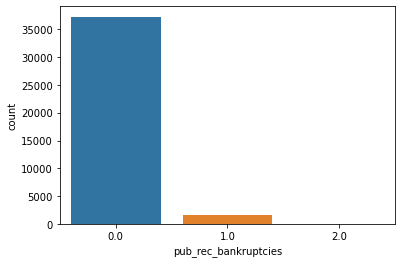

In [66]:
sns.countplot(data=final_df,x='pub_rec_bankruptcies')
plt.savefig('countplot.jpg', dpi=400)

by the above plot we can see that the bank ruptcies committed by the loan customers and more than 35000 did not have bankruptcies in the past and like less than 5000 who committed only one and two might be zero or just a one digit number

In [32]:
final_df['pub_rec_bankruptcies'].value_counts() #so as i said two bank ruptcies

0.0    37263
1.0     1668
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [33]:
final_df['total_rec_late_fee']

0         0.00
1         0.00
2         0.00
3        16.97
4         0.00
         ...  
39712     0.00
39713     0.00
39714     0.00
39715     0.00
39716     0.00
Name: total_rec_late_fee, Length: 39635, dtype: float64

In [34]:
final_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [35]:
final_df['purpose'].value_counts()

debt_consolidation    18609
credit_card            5126
other                  3981
home_improvement       2973
major_purchase         2181
small_business         1818
car                    1549
wedding                 941
medical                 692
moving                  583
vacation                381
house                   379
educational             320
renewable_energy        102
Name: purpose, dtype: int64

In [36]:
final_df['purpose'].mode()

0    debt_consolidation
dtype: object

### Purpose and public recorded bankruptcies

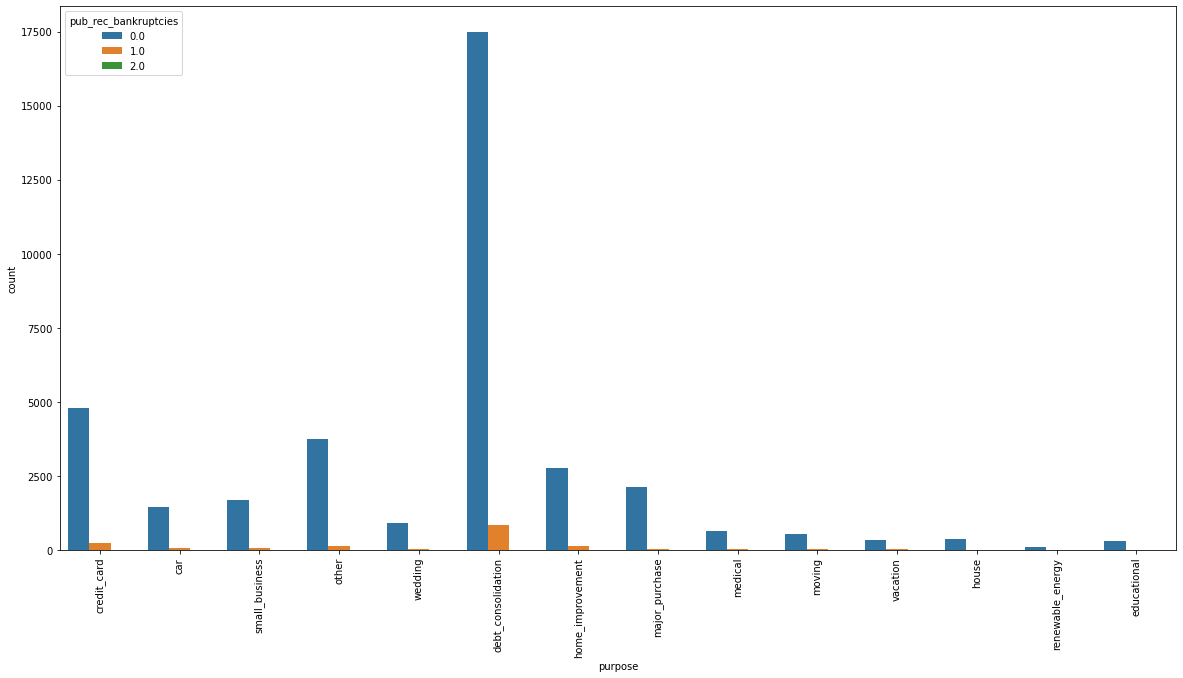

In [67]:
plt.figure(figsize=(20, 10))
sns.countplot(data=final_df,x='purpose', hue='pub_rec_bankruptcies')
plt.xticks(rotation=90)
plt.savefig('countplot_pvp.jpg', dpi=400)

in the above plot we can check all the 14 purpose for loan and indvidually can check the bank ruptcies made in the certain division
And we can say that in debit consolidation there are more bank ruptcies made
and also few like credit card, home improvement, others too

### Loan amount V Purpose

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

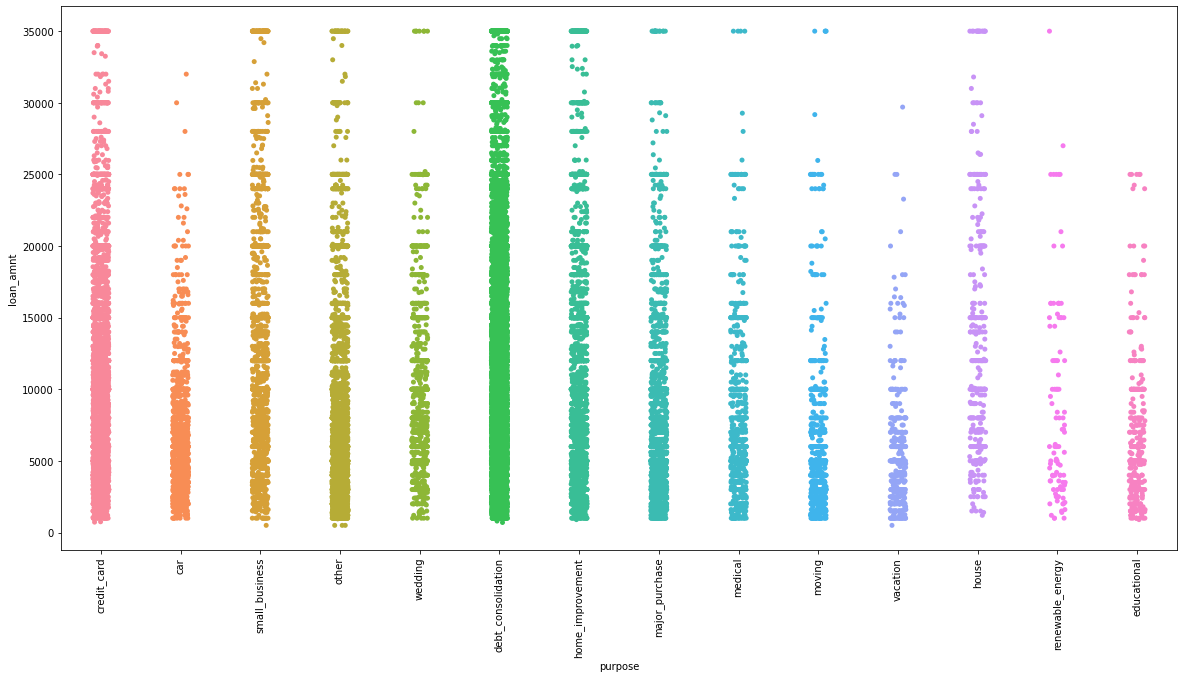

In [38]:
plt.figure(figsize=(20, 10))
sns.stripplot(data=final_df, x='purpose',y='loan_amnt')
plt.xticks(rotation=90)


by above stripplot we can understand the loan amount for every purpose taken by the client and most of the people have taken loan for debit consolidation and less number of people took the loan for renewable energy

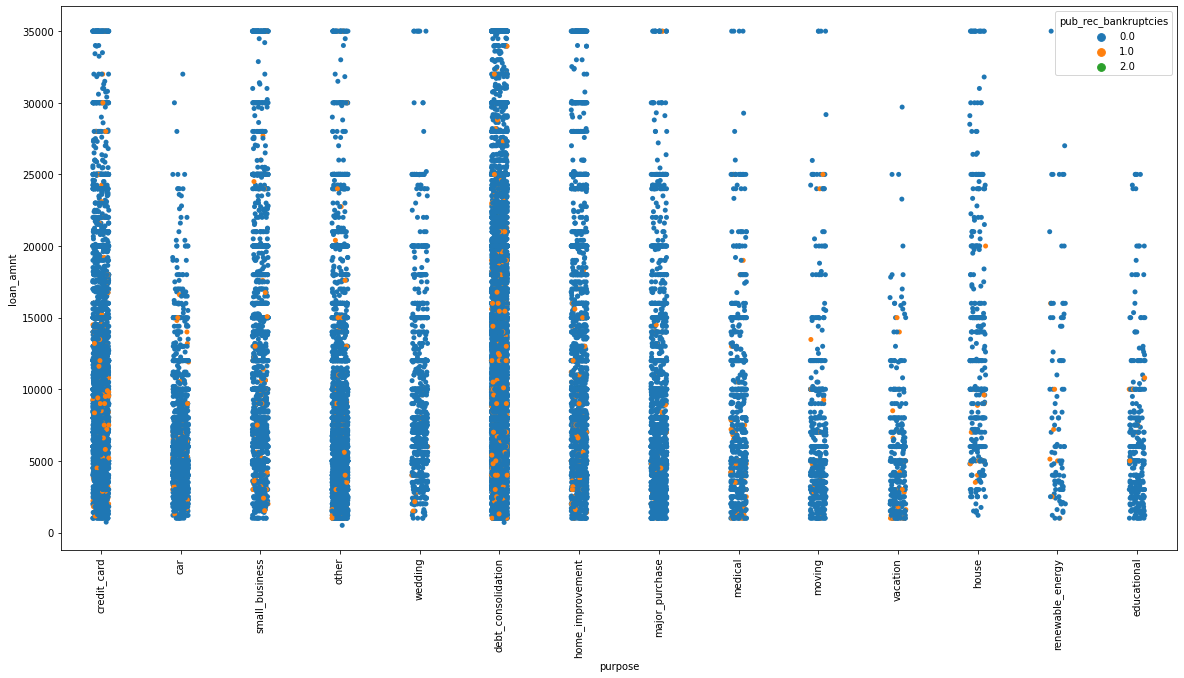

In [68]:
plt.figure(figsize=(20, 10))
sns.stripplot(data=final_df, x='purpose',y='loan_amnt', hue='pub_rec_bankruptcies')
plt.xticks(rotation=90)
plt.savefig('strip.jpg', dpi=400)

unlike the above stripplot we looked at i added hue to this to check on the recorded bankruptcies an still we can see that debit consolidation has most and credit card has few 

by this we can also notice that the lowest loan amount of debit consolidation has bankruptcies too

### Funded amount V Purpose

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

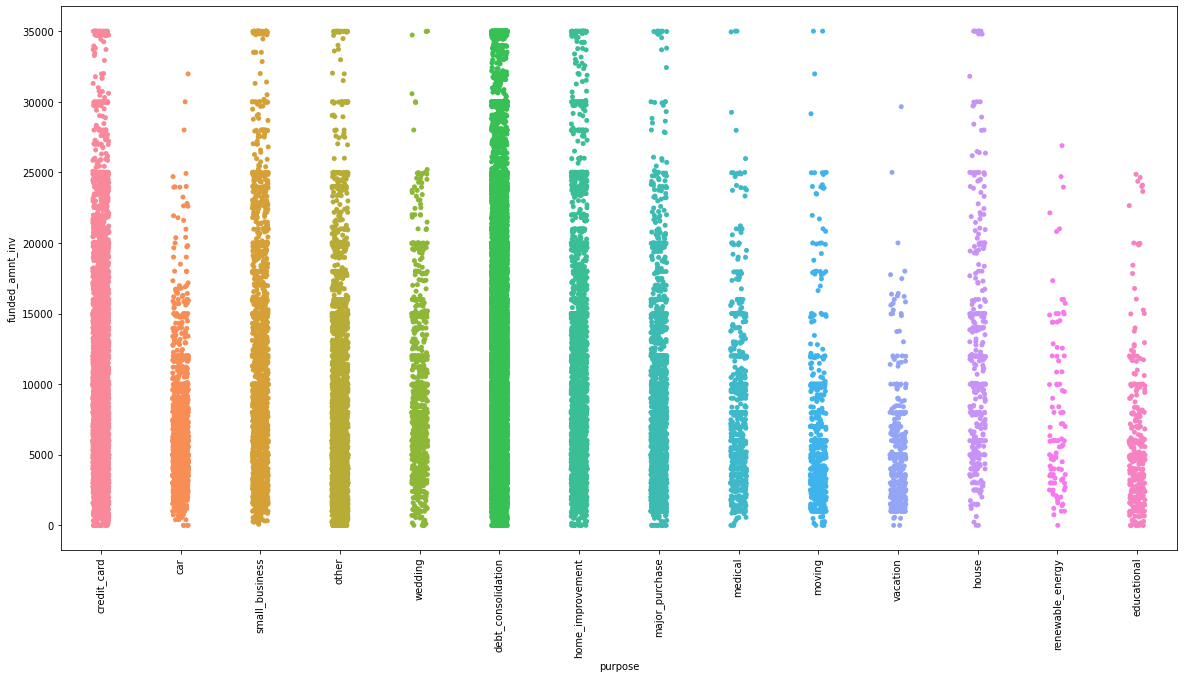

In [40]:
plt.figure(figsize=(20, 10))
sns.stripplot(data=final_df, x='purpose',y='funded_amnt_inv')
plt.xticks(rotation=90)

its the same as the loan amount but just was checking if the funded amount 
and also we can understand here is that the loan amount applied by the borrower and the amount invested are same and we can say that all the clients got invested with 
loan amount they asked for

In [41]:
final_df['int_rate'].max()
#most of the lon amount has an interest rate of 9.99%

'9.99%'

In [42]:
final_df.int_rate=final_df.int_rate.apply(lambda x : float(x.replace('%','')))

In [43]:
final_df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39635, dtype: float64

In [44]:
final_df['int_rate'].describe()

count    39635.000000
mean        12.017111
std          3.724682
min          5.420000
25%          9.250000
50%         11.830000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

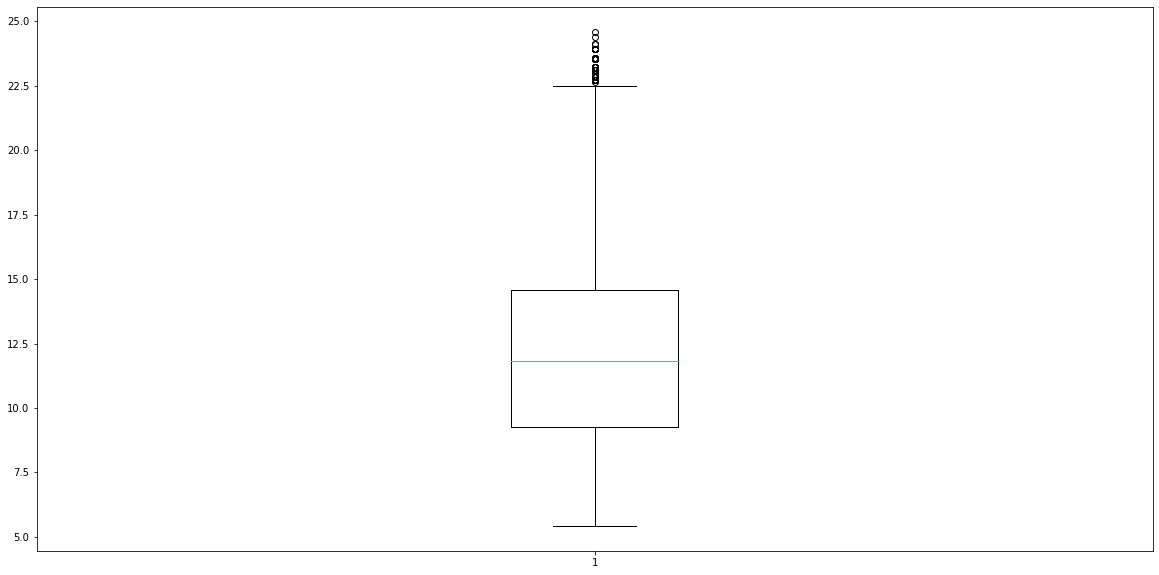

In [70]:
plt.figure(figsize=(20, 10))
plt.boxplot(final_df['int_rate'])
plt.savefig('intratebox.jpg', dpi=400)

In [46]:
final_df['installment'].max()

1305.19

In [47]:
final_df['installment'].describe()

count    39635.000000
mean       324.709635
std        208.835050
min         15.690000
25%        167.080000
50%        280.530000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

In [48]:
final_df['purpose'][final_df.int_rate>22].value_counts()

debt_consolidation    110
credit_card            25
other                  18
small_business         15
home_improvement        4
major_purchase          4
house                   2
moving                  2
wedding                 2
medical                 1
car                     1
renewable_energy        1
vacation                1
Name: purpose, dtype: int64

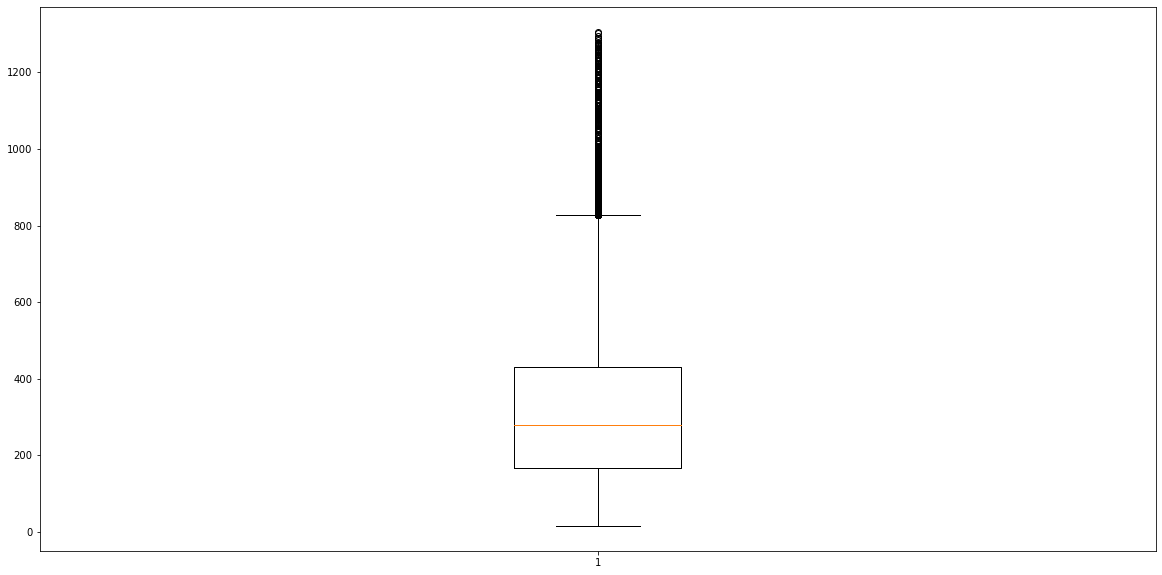

In [69]:
plt.figure(figsize=(20, 10))
plt.boxplot(final_df['installment'])
plt.savefig('installmentbox.jpg', dpi=400)

in the above box plot we can see that the installments there are outliers 900 to 1300

and i want to know what are the purpose of the amount taken for loan above 900

In [51]:
final_df['purpose'][final_df.installment>900].value_counts()

debt_consolidation    311
credit_card            73
home_improvement       57
small_business         48
other                  23
house                  15
major_purchase         10
wedding                 3
medical                 2
renewable_energy        1
moving                  1
Name: purpose, dtype: int64

these are all the above purpose which all pay monthly installments more than 900 

### Interest rate V Installments

<AxesSubplot:xlabel='int_rate', ylabel='installment'>

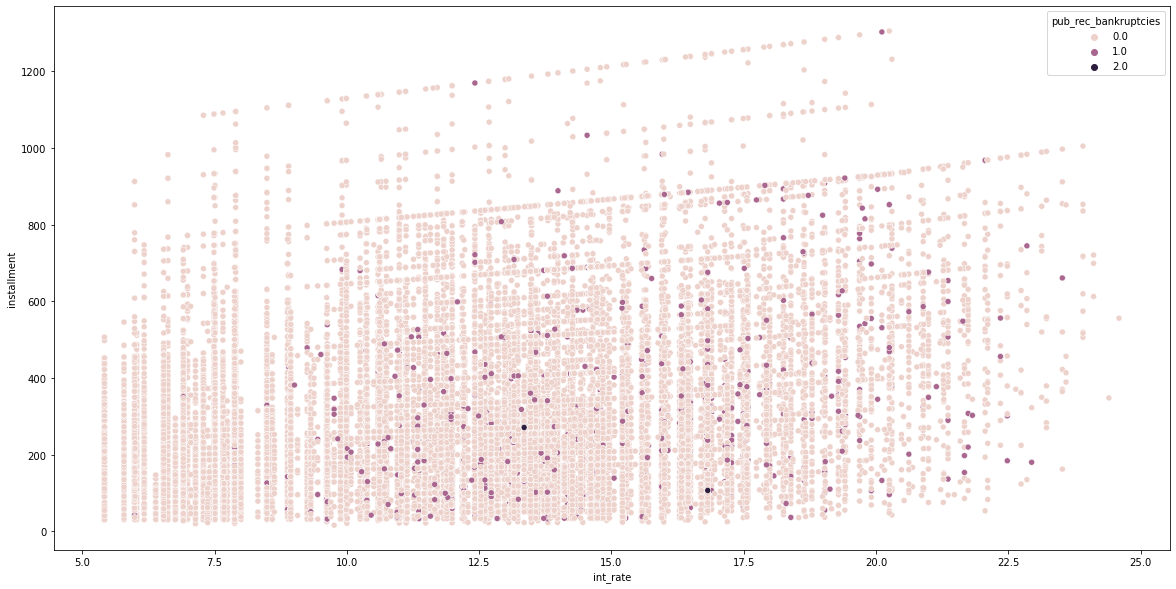

In [52]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=final_df, x='int_rate', y='installment', hue='pub_rec_bankruptcies')

from the above plot we can understand that there are interest rates 5 to 25 having monthly installements from 0 to 800 but interest rates from 7.5 to 20 only have 900 to 1300 installments

we can also understand that maximum of the bankruptcies are made in between 0 to 800 monthly installements only

### Annual income V monthly installement

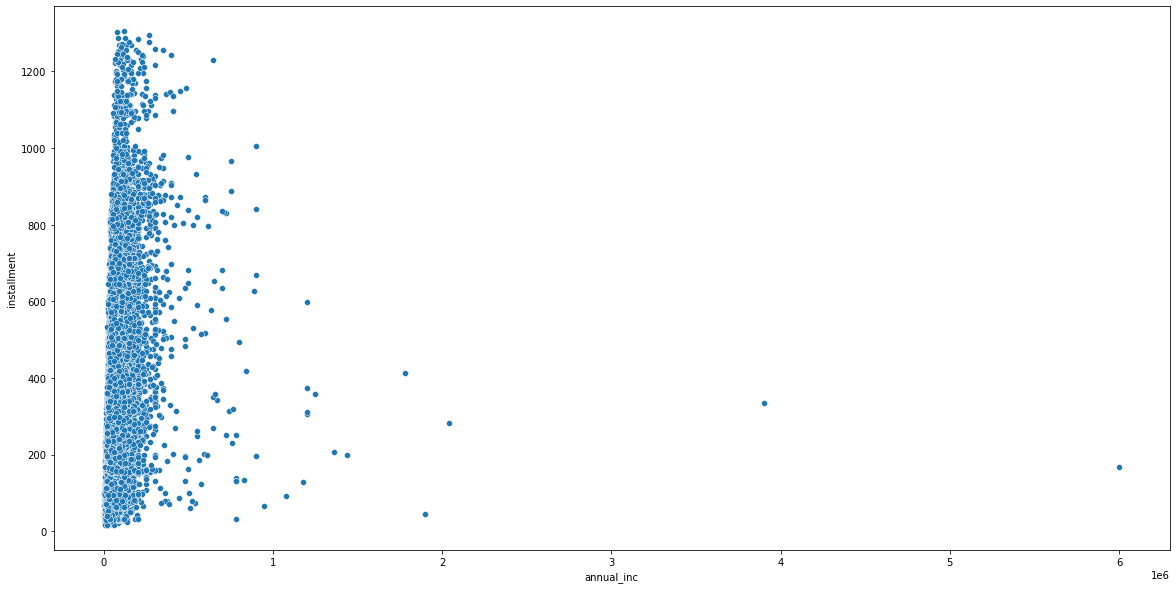

In [71]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=final_df, x='annual_inc', y='installment')
plt.savefig('scatterincvinst.jpg', dpi=400)

from above plot we can understand the people who pay installemnts paid from 0 to 1300 are all from 0 to 1.5 lakh annaul income and only theres one from 6 lakh income who only pays 0 to 200 installement per month

<AxesSubplot:xlabel='annual_inc', ylabel='installment'>

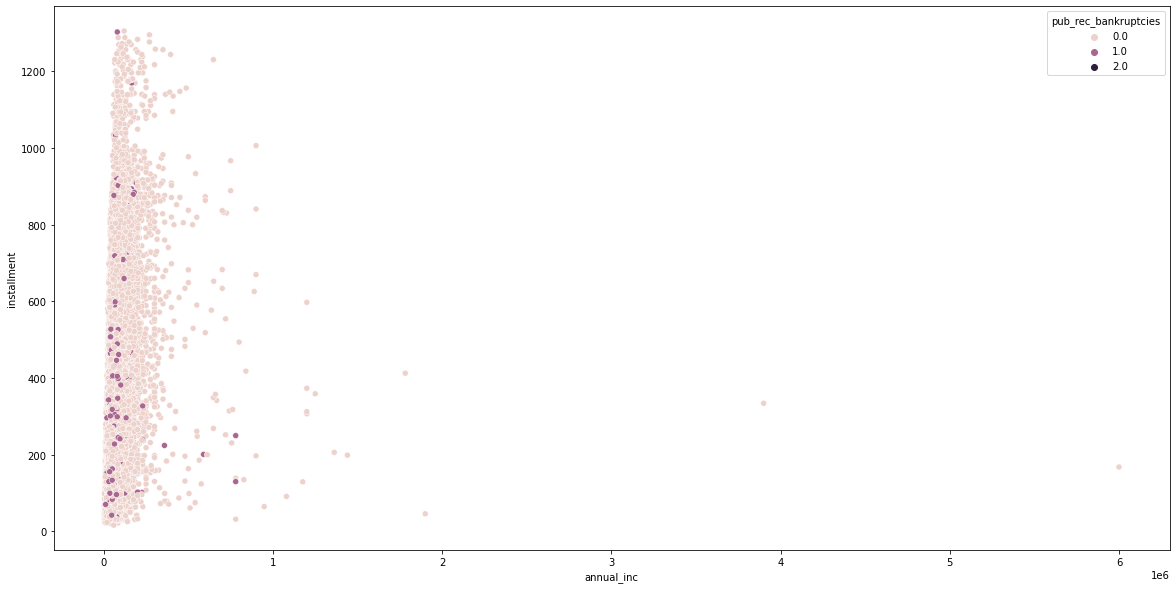

In [54]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=final_df, x='annual_inc', y='installment', hue='pub_rec_bankruptcies')

Here we can also understand that the people who have 0 to 1 lakh annual income only has bankruptcies

In [56]:
final_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

<AxesSubplot:xlabel='annual_inc', ylabel='recoveries'>

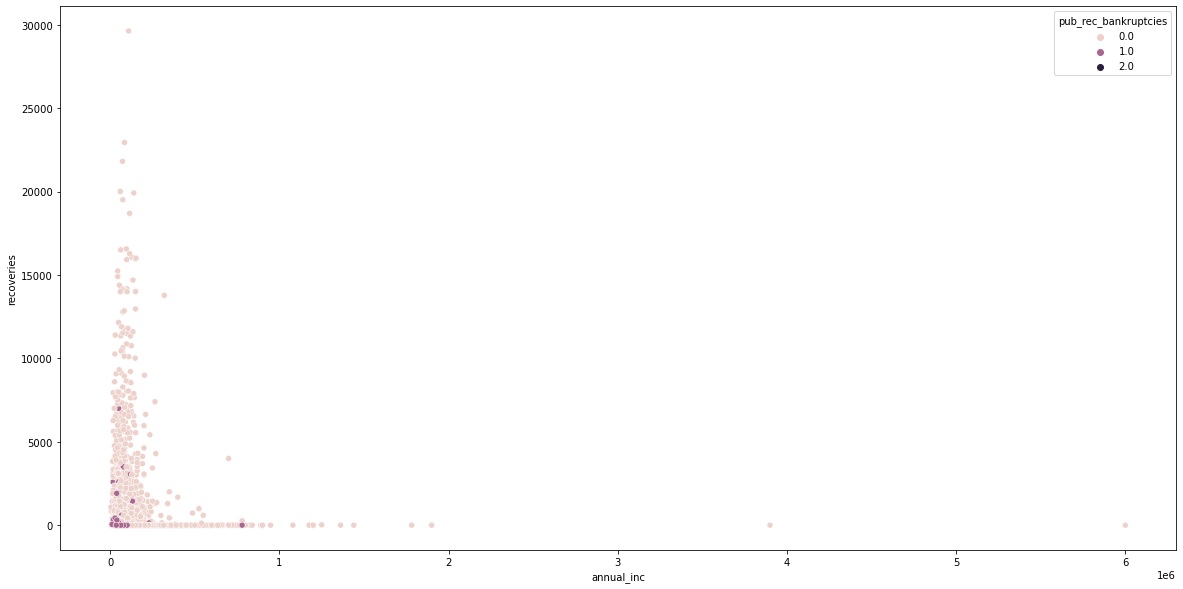

In [61]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=final_df, x='annual_inc', y='recoveries', hue='pub_rec_bankruptcies')

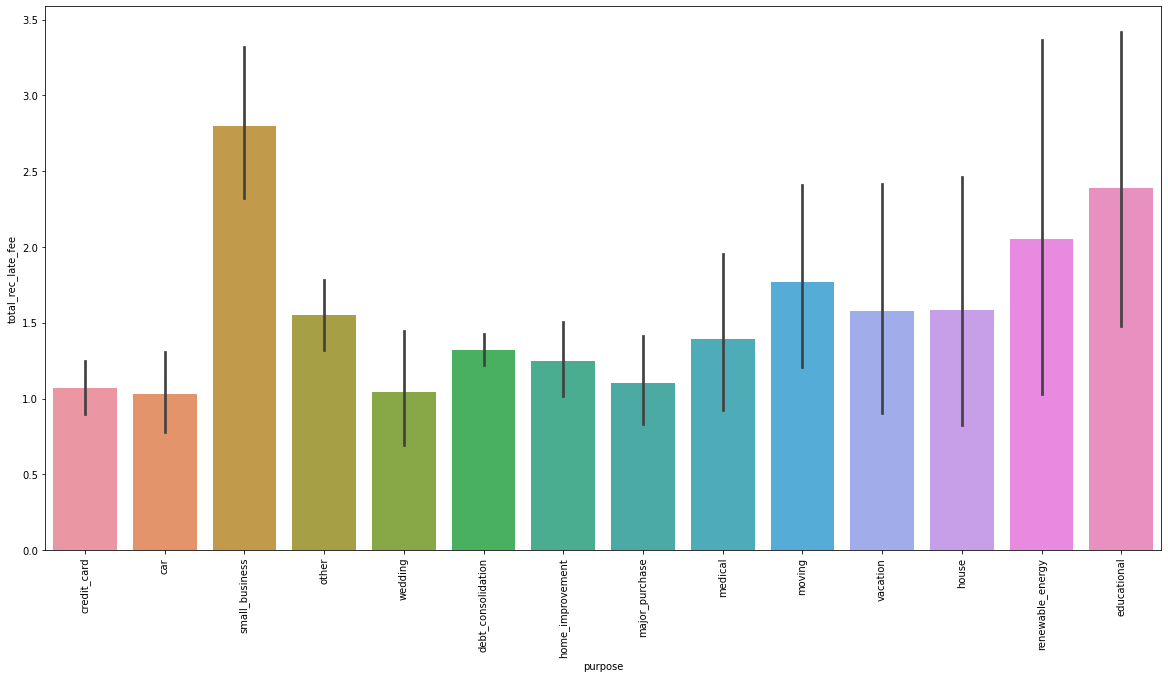

In [72]:
plt.figure(figsize=(20, 10))
sns.barplot(x='purpose', y ='total_rec_late_fee', data=final_df)
plt.xticks(rotation=90)
plt.savefig('bar.jpg', dpi=400)

by this plot we can know that there's high rate of late fee in small business and educational purpose

to prevent this its better to ask take a background check about the person's ability of earning or if its educational purpose to check who the student is dependent and there background